In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sdf
import re
import os
import glob
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (10, 8)

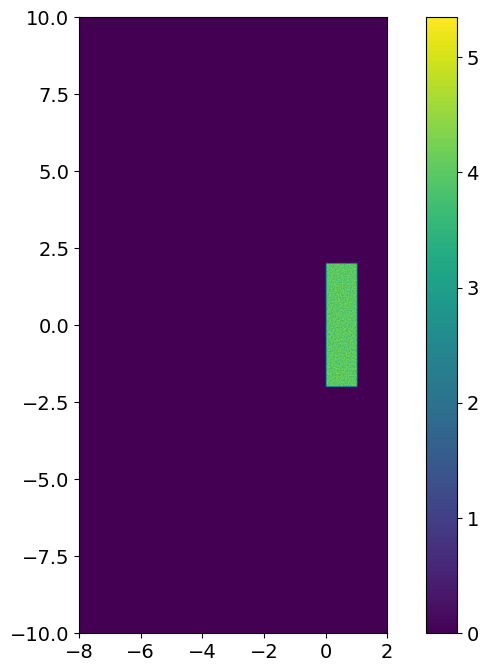

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sdf
import re
import os
import glob
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (10, 8)

DATA_DIR = "14run"
ALL_FILES = glob.glob(f"{DATA_DIR}/*sdf")
ALL_FILES.sort()
POINTS = len(ALL_FILES)
PI = np.pi

with open(os.path.join(DATA_DIR, "input.deck"), "r") as myfile:
    data = myfile.read()
def find_value(info):
    regex = re.compile(rf"\s{info}\s*=\s*-?(\d+\.?\d*)")
    match = regex.search(data)
    if match:
        return float(match.group(1))
    else:
        return None
    
def find_angle(data):
    angle_reg = re.compile("upper_theta\s+=\s+(\d{0,3})\s{0,3}\*?\s{0,3}pi\s{0,3}\/\s{0,3}(\d{0,3})")
    try:
        a, b = angle_reg.search(data).groups()
    except AttributeError:
        angle_pretty = 0
        angle_rad = 0
        angle_degree = 0
        return angle_pretty, angle_degree, angle_rad

    angle_pretty = f"{a}π/{b}"
    if not a and not b:
        raise ValueError("Angle is not parsed correctly.")
    if not a:
        a = 1
    if not b:
        b = 1
    angle_rad = int(a) * PI / int(b)
    angle_degree = angle_rad * 180 / PI
    angle_degree = round(angle_degree, 1)
    return angle_pretty, angle_degree, angle_rad

angle_pretty, angle_degree, ANGLE = find_angle(data)

raw_data = sdf.read(ALL_FILES[0])
lambd = 1e-6
c = 3e8
omega = 2*np.pi*c/lambd
n_c = omega*omega/(4*np.pi*np.pi*81)
X, Y = raw_data.Grid_Grid.data
X = X/lambd
Y = Y/lambd
X_MIN = X.min()
X_MAX = X.max()
Y_MIN = Y.min()
Y_MAX = Y.max()
NX = int(find_value("cells_x"))
NY = int(find_value("cells_y"))
EXTENT = [X_MIN, X_MAX, Y_MIN, Y_MAX]
plt.imshow(raw_data.Derived_Number_Density_Electron.data.T/n_c, extent=EXTENT, origin="lower")
# plt.scatter(x0, y0, marker="x", color="red")
plt.colorbar()

In [3]:
DATA_DIR = "14run"
ALL_FILES = glob.glob(f"{DATA_DIR}/*sdf")
ALL_FILES.sort()
POINTS = len(ALL_FILES)
PI = np.pi

with open(os.path.join(DATA_DIR, "input.deck"), "r") as myfile:
    data = myfile.read()
def find_value(info):
    regex = re.compile(rf"\s{info}\s*=\s*-?(\d+\.?\d*)")
    match = regex.search(data)
    if match:
        return float(match.group(1))
    else:
        return None
    
def find_angle(data):
    angle_reg = re.compile("upper_theta\s+=\s+(\d{0,3})\s{0,3}\*?\s{0,3}pi\s{0,3}\/\s{0,3}(\d{0,3})")
    try:
        a, b = angle_reg.search(data).groups()
    except AttributeError:
        angle_pretty = 0
        angle_rad = 0
        angle_degree = 0
        return angle_pretty, angle_degree, angle_rad

    angle_pretty = f"{a}π/{b}"
    if not a and not b:
        raise ValueError("Angle is not parsed correctly.")
    if not a:
        a = 1
    if not b:
        b = 1
    angle_rad = int(a) * PI / int(b)
    angle_degree = angle_rad * 180 / PI
    angle_degree = round(angle_degree, 1)
    return angle_pretty, angle_degree, angle_rad

angle_pretty, angle_degree, ANGLE = find_angle(data)

In [4]:
angle_degree, ANGLE, angle_pretty

(45.0, 0.7853981633974483, 'π/4')

In [5]:
raw_data = sdf.read(ALL_FILES[0])

In [6]:
lambd = 1e-6
c = 3e8
omega = 2*np.pi*c/lambd
n_c = omega*omega/(4*np.pi*np.pi*81)

In [7]:
X, Y = raw_data.Grid_Grid.data
X = X/lambd
Y = Y/lambd
X_MIN = X.min()
X_MAX = X.max()
Y_MIN = Y.min()
Y_MAX = Y.max()
NX = int(find_value("cells_x"))
NY = int(find_value("cells_y"))
EXTENT = [X_MIN, X_MAX, Y_MIN, Y_MAX]
NX = 1000

In [8]:
def x_position_to_node(x):
    return int((x - X_MIN)/(X_MAX - X_MIN)*NX)

def y_position_to_node(y):
    return int((y - Y_MIN)/(Y_MAX - Y_MIN)*NY)

def get_y_for_x(x):
    return x*np.tan(ANGLE)

In [34]:
def x_position_to_node(x):
    return int((x - X_MIN)/(X_MAX - X_MIN)*NX)

def y_position_to_node(y):
    return int((y - Y_MIN)/(Y_MAX - Y_MIN)*NY)

def get_y_for_x(x):
    return x*np.tan(ANGLE)

In [35]:
X_MIN = -8
Y_MIN = -10
X_MAX = 2
Y_MAX = 10
NX = 2000
NY = 4000
THETA = np.pi/6